In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/Health index.csv')
df.tail()

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power_factor,Interfacial_V,Dielectric_rigidity,Water_content,Health_index,Life_expectation
465,15,227,52900,3,60,853,3,84,0,0.0,1.00,32,56,28,13.4,51.0
466,15,334,47100,3,64,622,3,108,0,0.0,1.00,32,55,12,13.4,51.0
467,15,1280,35000,2,675,2530,0,0,0,5.0,0.30,45,58,8,13.4,6.5
468,15,169,50600,5,77,532,0,72,0,0.0,1.21,33,54,11,13.4,51.0
469,15,308,39700,3,64,581,5,27,0,0.0,1.00,32,60,18,13.4,51.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hydrogen             470 non-null    int64  
 1   Oxigen               470 non-null    int64  
 2   Nitrogen             470 non-null    int64  
 3   Methane              470 non-null    int64  
 4   CO                   470 non-null    int64  
 5   CO2                  470 non-null    int64  
 6   Ethylene             470 non-null    int64  
 7   Ethane               470 non-null    int64  
 8   Acethylene           470 non-null    int64  
 9   DBDS                 470 non-null    float64
 10  Power_factor         470 non-null    float64
 11  Interfacial_V        470 non-null    int64  
 12  Dielectric_rigidity  470 non-null    int64  
 13  Water_content        470 non-null    int64  
 14  Health_index         470 non-null    float64
 15  Life_expectation     470 non-null    flo

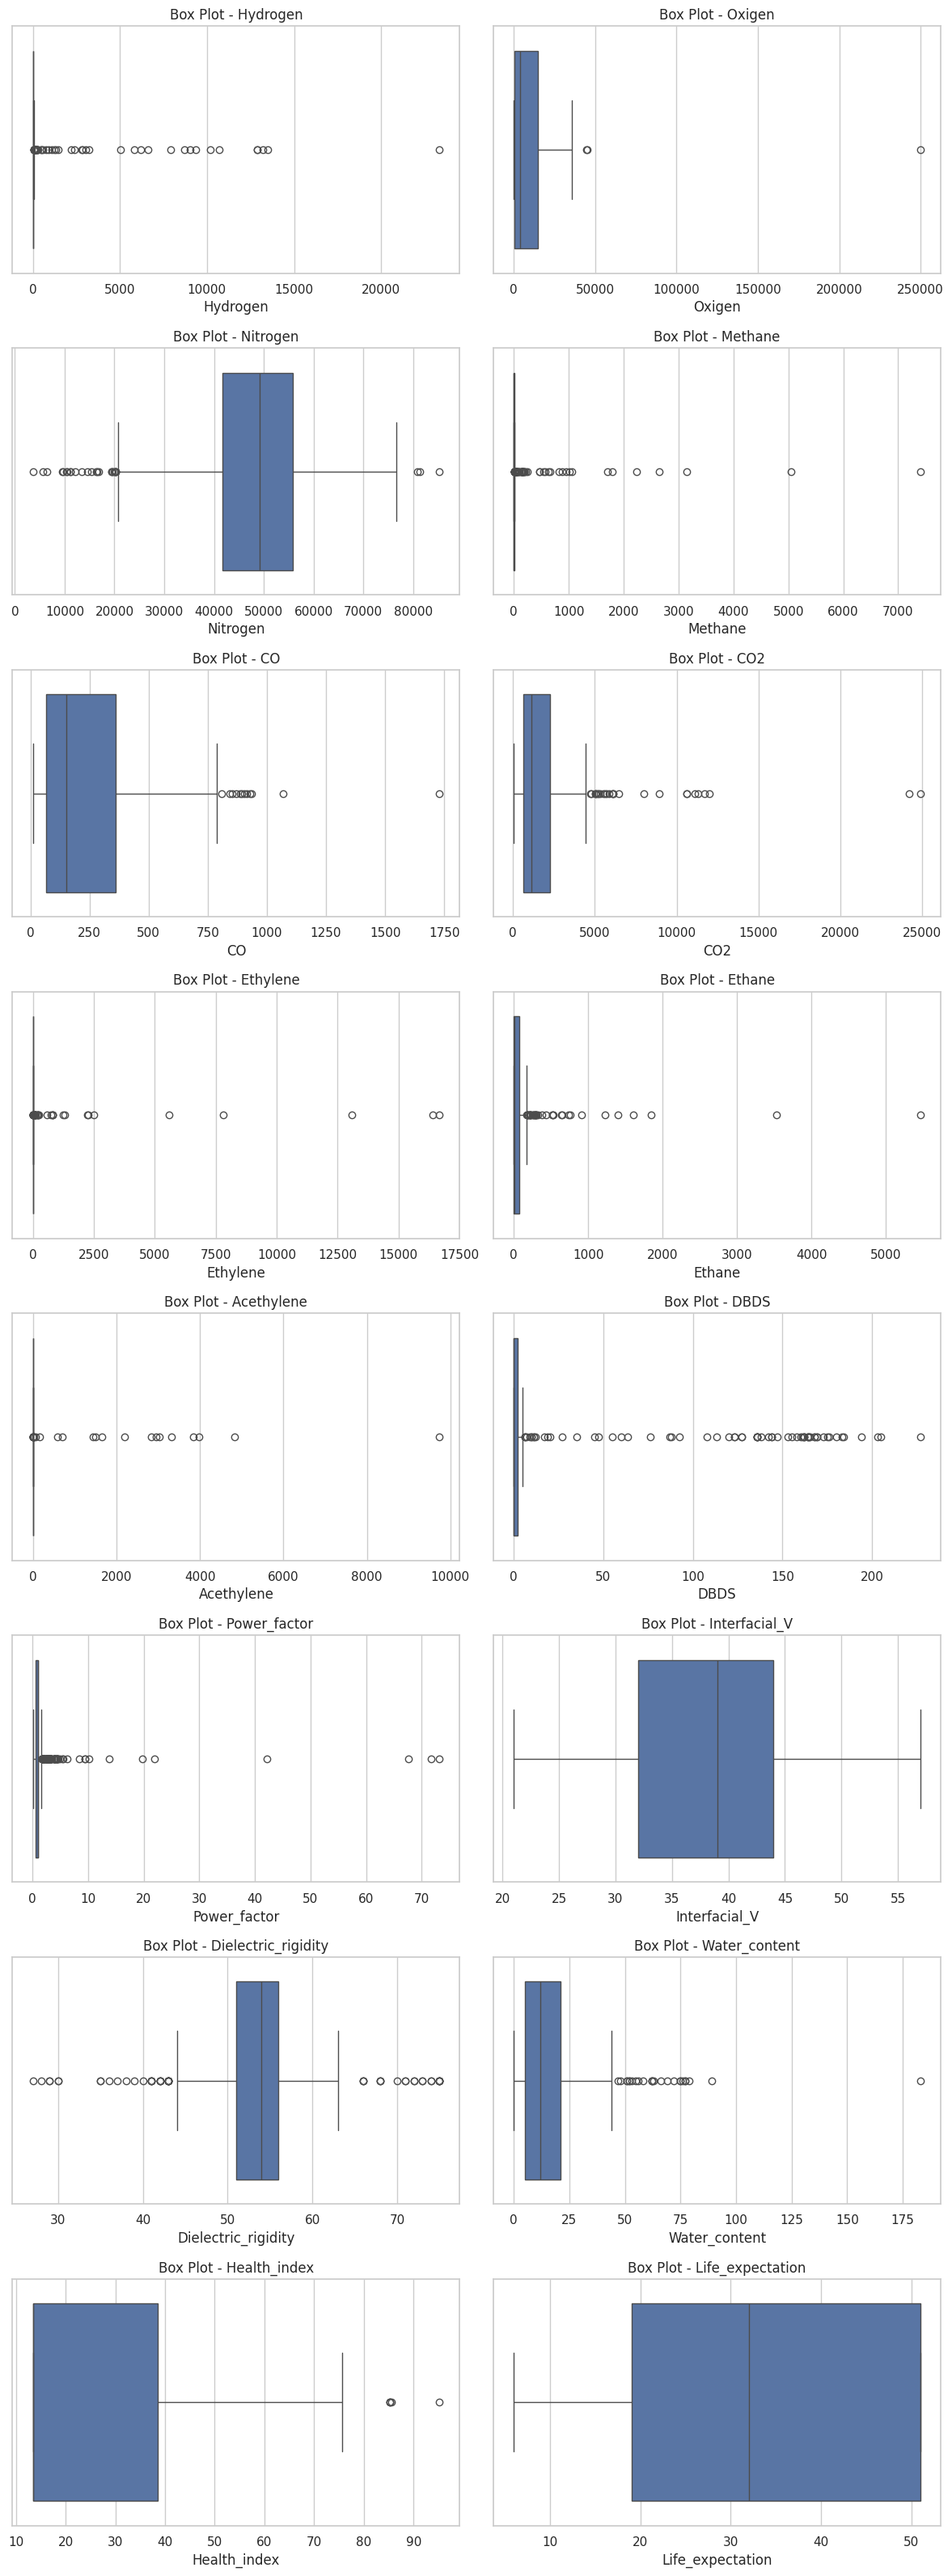

In [ ]:
sns.set(style='whitegrid')
num_columns = len(df.columns)
num_rows = (num_columns + 1)//2
num_cols = 2

plt.figure(figsize=(12,4* num_rows))
for i, column in enumerate(df.columns):
  plt.subplot(num_rows, num_cols, i+1)
  sns.boxplot(x=df[column])
  plt.title(f'Box Plot - {column}')

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats.mstats import winsorize
df = df.apply(lambda x: winsorize(x, limits=[0.05,0.05]))

In [ ]:
df.shape

(470, 16)

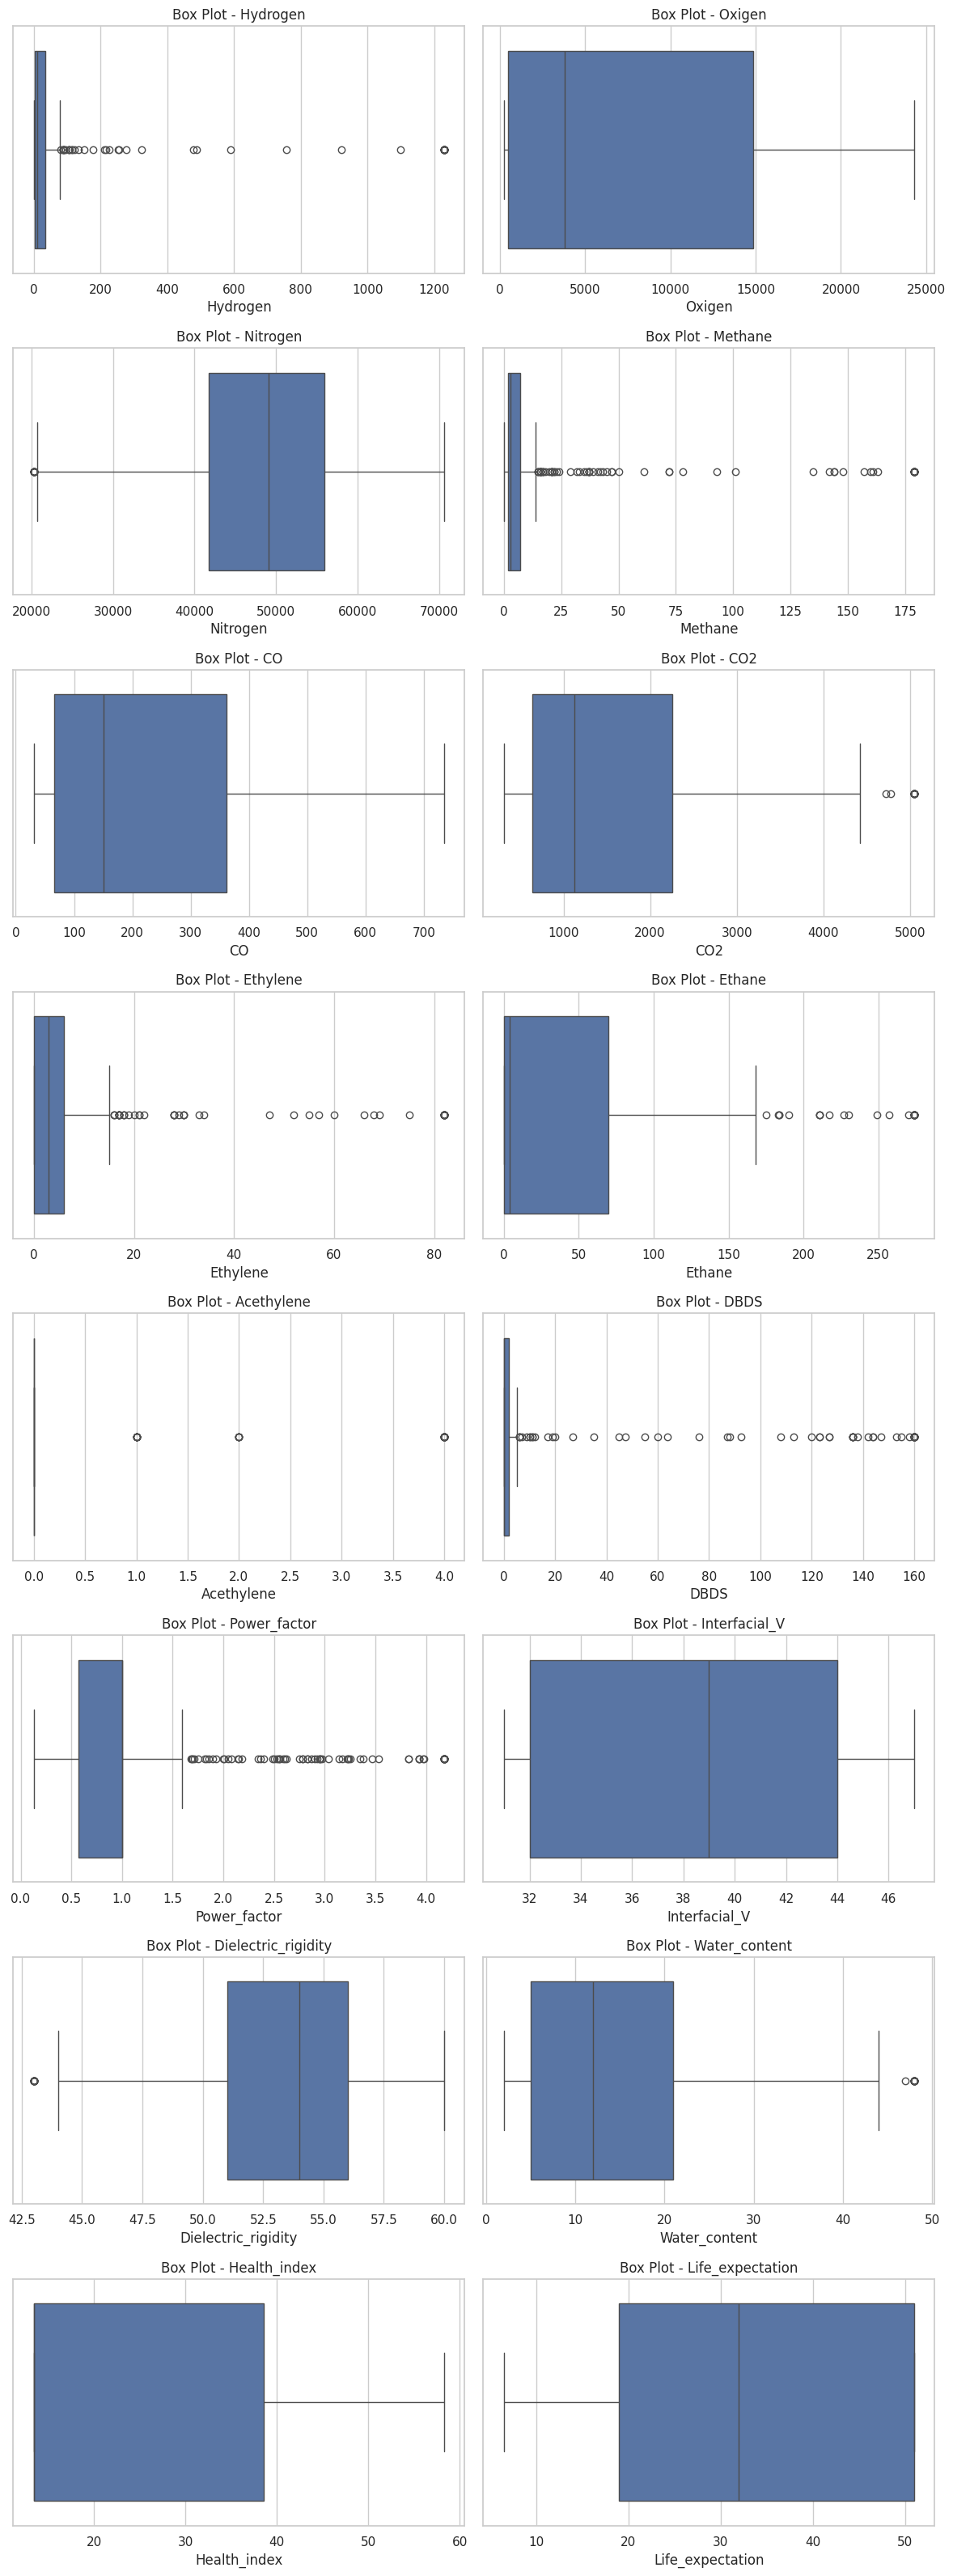

In [ ]:
sns.set(style='whitegrid')
num_columns = len(df.columns)

num_rows = (num_columns + 1) // 2
num_cols = 2

# Plot box plots for each column
plt.figure(figsize=(12, 4 * num_rows))
for i, column in enumerate(df.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot - {column}')

plt.tight_layout()
plt.show()

In [ ]:
'''
test_df = df.copy()
from scipy.stats import zscore
z_score = np.abs(zscore(test_df.select_dtypes(include=[np.number])))
z_score_threshold = 3
test_df = test_df[(z_score < z_score_threshold).all(axis=1)]'''

'\ntest_df = df.copy()\nfrom scipy.stats import zscore\nz_score = np.abs(zscore(test_df.select_dtypes(include=[np.number])))\nz_score_threshold = 3\ntest_df = test_df[(z_score < z_score_threshold).all(axis=1)]'

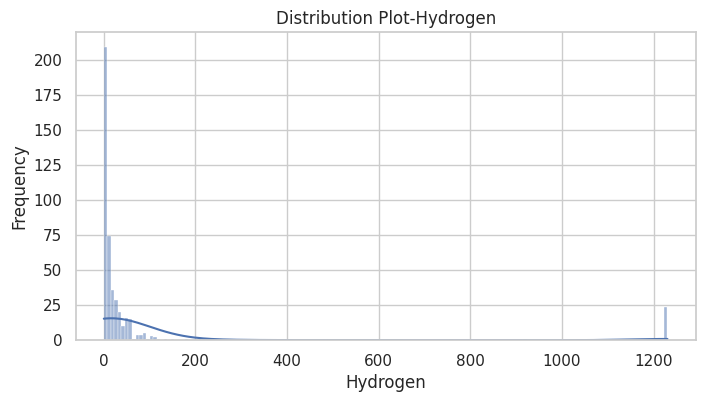

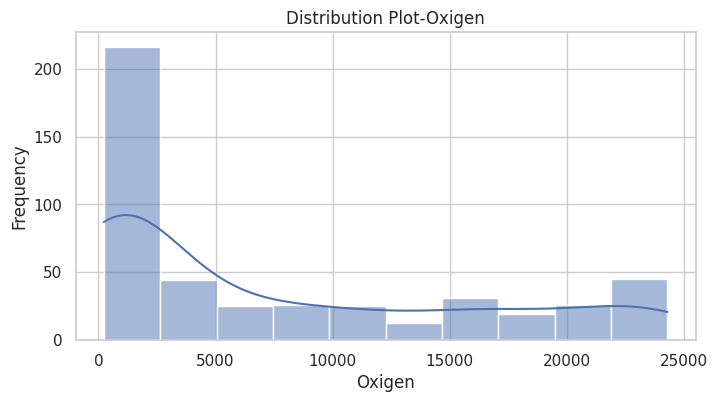

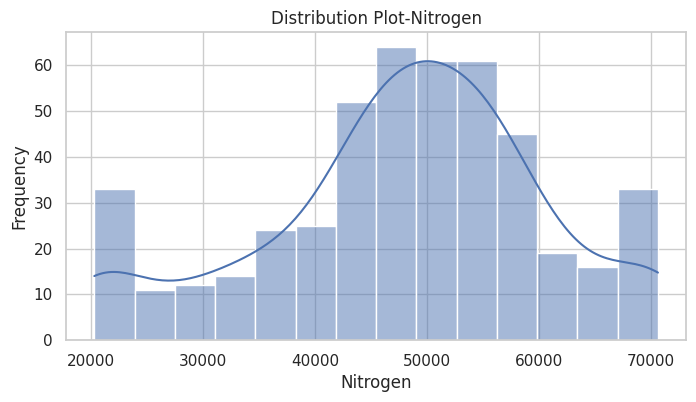

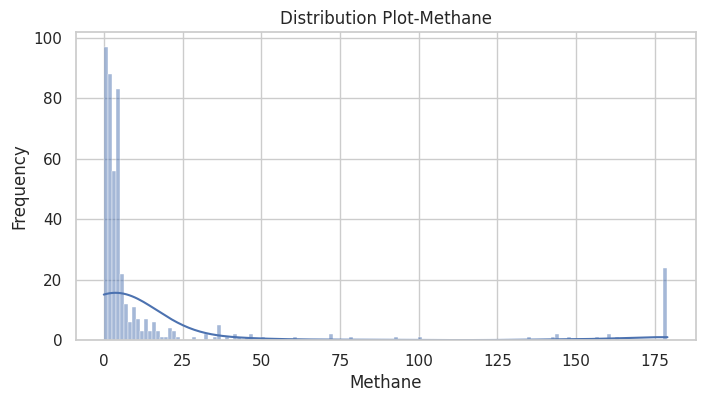

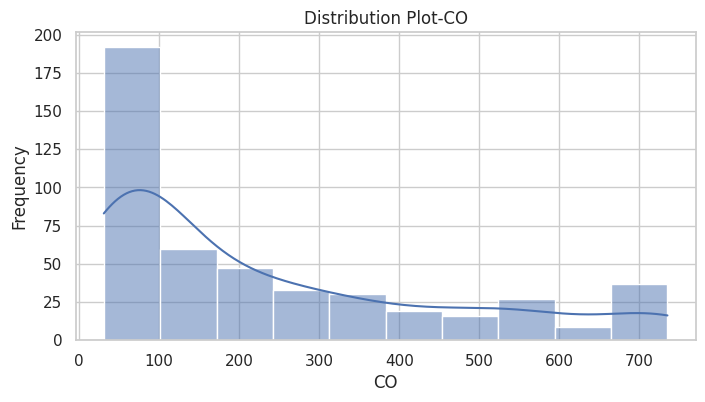

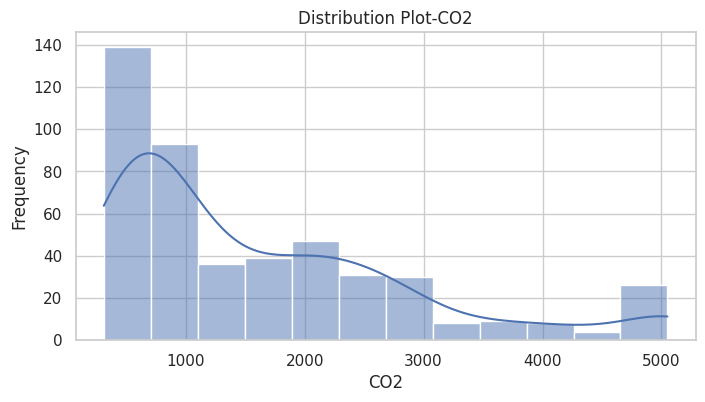

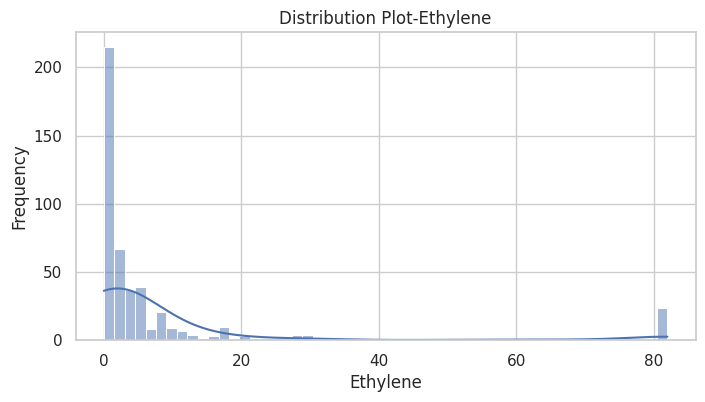

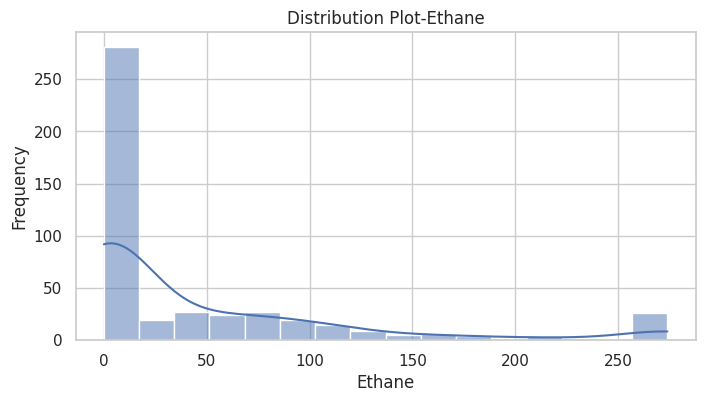

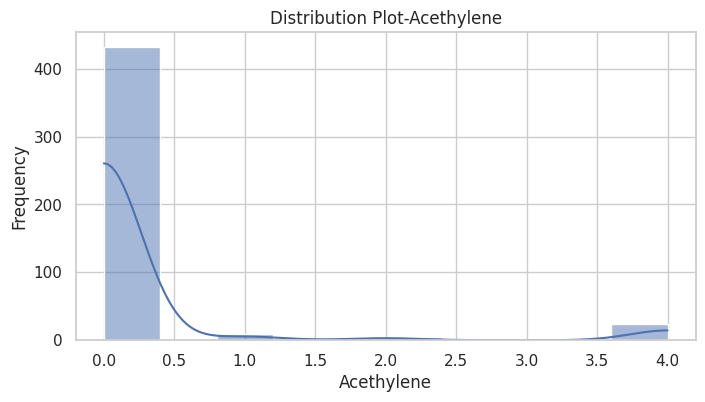

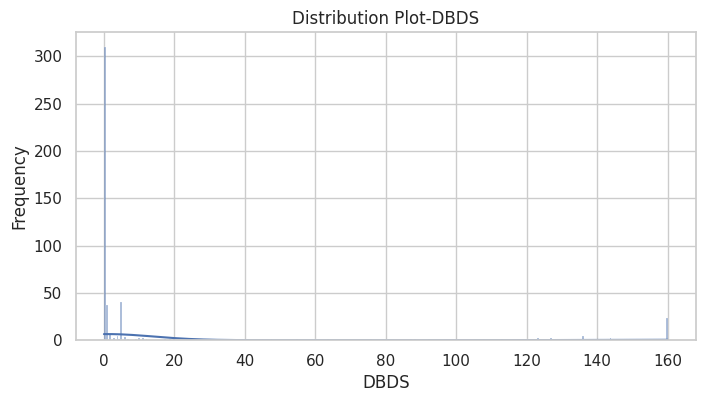

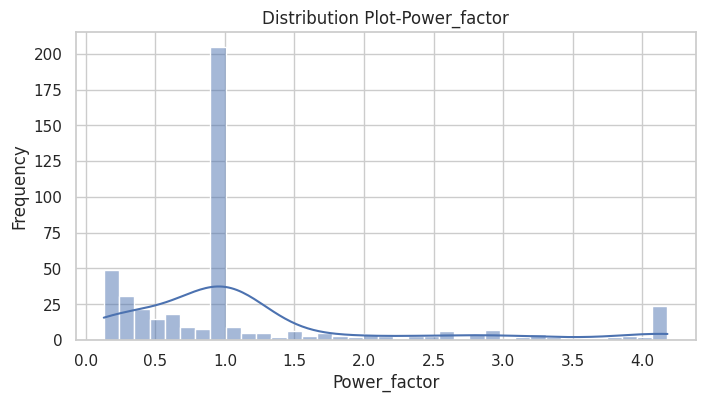

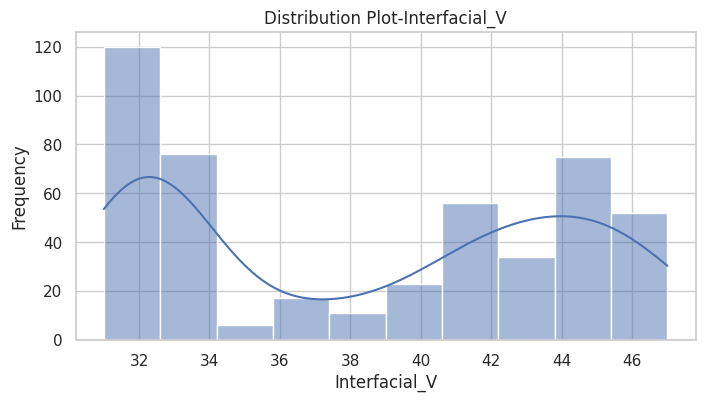

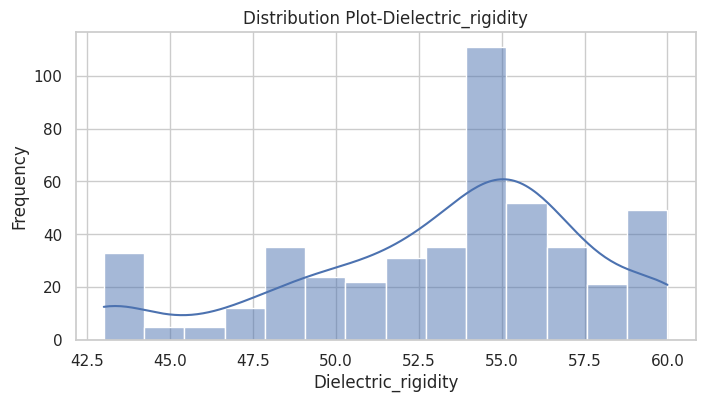

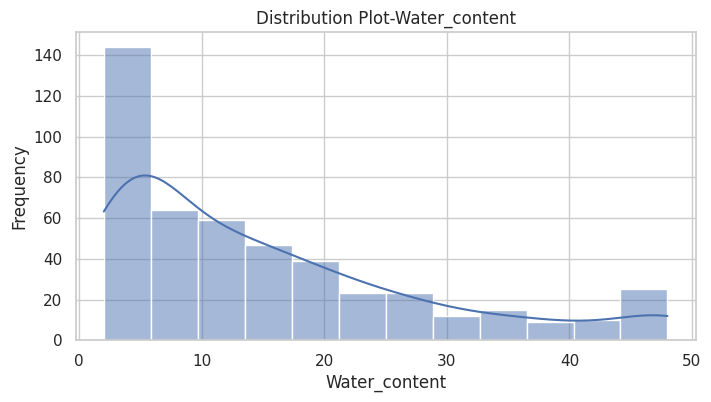

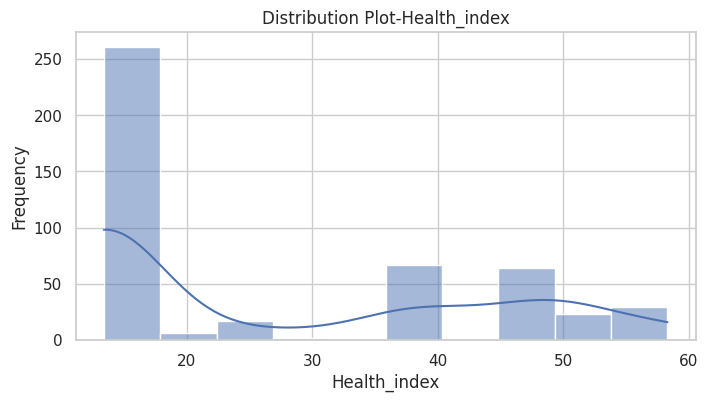

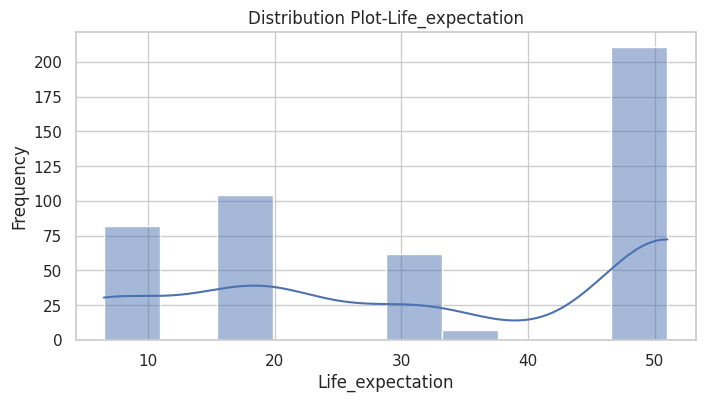

In [ ]:
def plot_distplot(df):
  numeric_columns = df.select_dtypes(include=[np.number]).columns
  for column in numeric_columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df[column],kde=True)
    plt.title(f'Distribution Plot-{column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

plot_distplot(df)

In [ ]:
#test_df.shape

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['Health_index','Life_expectation'],axis=1)
y_health = df['Health_index']
y_life = df['Life_expectation']
X_train, X_test, y_health_train, y_health_test, y_life_train, y_life_test = train_test_split(X,y_health,y_life,test_size=0.2,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_health = RandomForestRegressor(random_state=42)
rf_life = RandomForestRegressor(random_state=42)

# Train the models
rf_health.fit(X_train, y_health_train)
rf_life.fit(X_train, y_life_train)

# Make predictions
y_health_pred = rf_health.predict(X_test)
y_life_pred = rf_life.predict(X_test)


In [ ]:
from sklearn.metrics import r2_score

# Evaluate the models
accuracy_health = r2_score(y_health_test, y_health_pred)
accuracy_life = r2_score(y_life_test, y_life_pred)

print('Health Index - R2 Score:', accuracy_health)
print('Life Expectation - R2 Score:', accuracy_life)


Health Index - R2 Score: 0.7401610428707447
Life Expectation - R2 Score: 0.8278097635134758


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 150, 200,350],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2,7,10,12],
    'min_samples_leaf': [1, 2, 4]
}

grid_health = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
grid_life = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)

grid_health.fit(X_train, y_health_train)
grid_life.fit(X_train, y_life_train)

best_params_health = grid_health.best_params_
best_params_life = grid_life.best_params_

# Use the best hyperparameters
rf_health = RandomForestRegressor(random_state=42, **best_params_health)
rf_life = RandomForestRegressor(random_state=42, **best_params_life)

rf_health.fit(X_train, y_health_train)
rf_life.fit(X_train, y_life_train)

# Evaluate the tuned models
y_health_pred_tuned = rf_health.predict(X_test)
y_life_pred_tuned = rf_life.predict(X_test)

accuracy_health_tuned = r2_score(y_health_test, y_health_pred_tuned)
accuracy_life_tuned = r2_score(y_life_test, y_life_pred_tuned)

print('Tuned Health Index - R2 Score:', accuracy_health_tuned)
print('Tuned Life Expectation - R2 Score:', accuracy_life_tuned)
print("Best hyperparameter for the health Index", grid_health.best_params_)
print("Best hyperparameter for Life Expectation",grid_life.best_params_)

Tuned Health Index - R2 Score: 0.7580486794983834
Tuned Life Expectation - R2 Score: 0.8316728598605021
Best hyperparameter for the health Index {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 150}
Best hyperparameter for Life Expectation {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 200}


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the model
lr_health = LinearRegression()
lr_life = LinearRegression()

# Train the models
lr_health.fit(X_train, y_health_train)
lr_life.fit(X_train, y_life_train)

# Make predictions
y_health_pred_lr = lr_health.predict(X_test)
y_life_pred_lr = lr_life.predict(X_test)

# Evaluate the models
accuracy_health_lr = r2_score(y_health_test, y_health_pred_lr)
accuracy_life_lr = r2_score(y_life_test, y_life_pred_lr)

print('Linear Regression - Health Index R2 Score:', accuracy_health_lr)
print('Linear Regression - Life Expectation R2 Score:', accuracy_life_lr)


Linear Regression - Health Index R2 Score: 0.6673046804673475
Linear Regression - Life Expectation R2 Score: 0.6148846688220171


In [ ]:
from xgboost import XGBRegressor

# Initialize the model
xgb_health = XGBRegressor(random_state=42)
xgb_life = XGBRegressor(random_state=42)

# Train the models
xgb_health.fit(X_train, y_health_train)
xgb_life.fit(X_train, y_life_train)

# Make predictions
y_health_pred_xgb = xgb_health.predict(X_test)
y_life_pred_xgb = xgb_life.predict(X_test)

# Evaluate the models
accuracy_health_xgb = r2_score(y_health_test, y_health_pred_xgb)
accuracy_life_xgb = r2_score(y_life_test, y_life_pred_xgb)

print('XGBoost - Health Index R2 Score:', accuracy_health_xgb)
print('XGBoost - Life Expectation R2 Score:', accuracy_life_xgb)


XGBoost - Health Index R2 Score: 0.6634157892667503
XGBoost - Life Expectation R2 Score: 0.7607031233986148


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores_health = cross_val_score(rf_health, X, y_health, cv=5, scoring='r2')
cv_scores_life = cross_val_score(rf_life, X, y_life, cv=5, scoring='r2')

print("Cross-Validation Scores for Health Index:", cv_scores_health)
print("Cross-Validation Scores for Life Expectation:", cv_scores_life)


Cross-Validation Scores for Health Index: [-1.66160210e+01 -1.51529593e+01 -8.43075827e+00 -5.71741267e+30
 -2.31624934e+31]
Cross-Validation Scores for Life Expectation: [-0.78819514  0.18452434  0.03365503 -0.16880129  0.68118248]


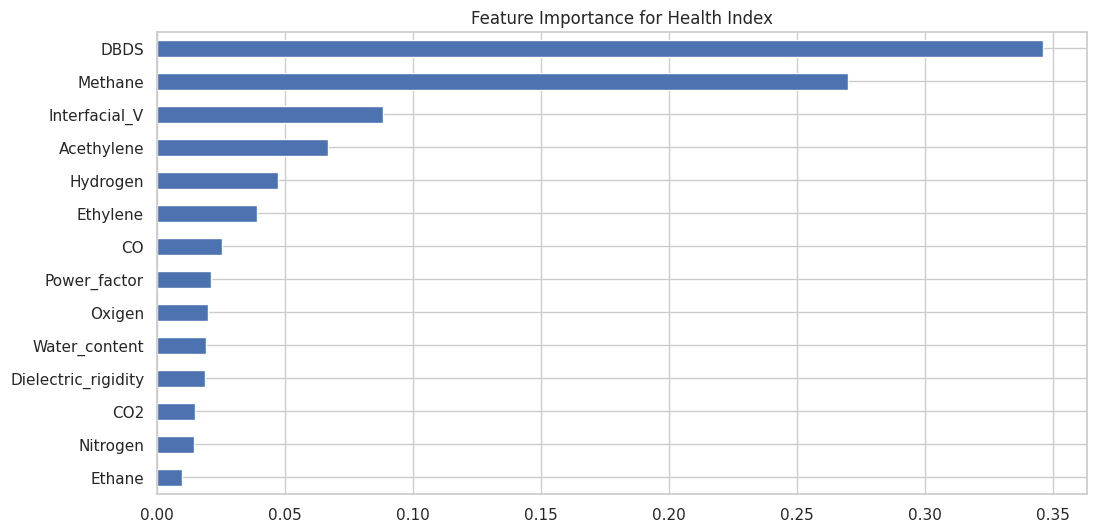

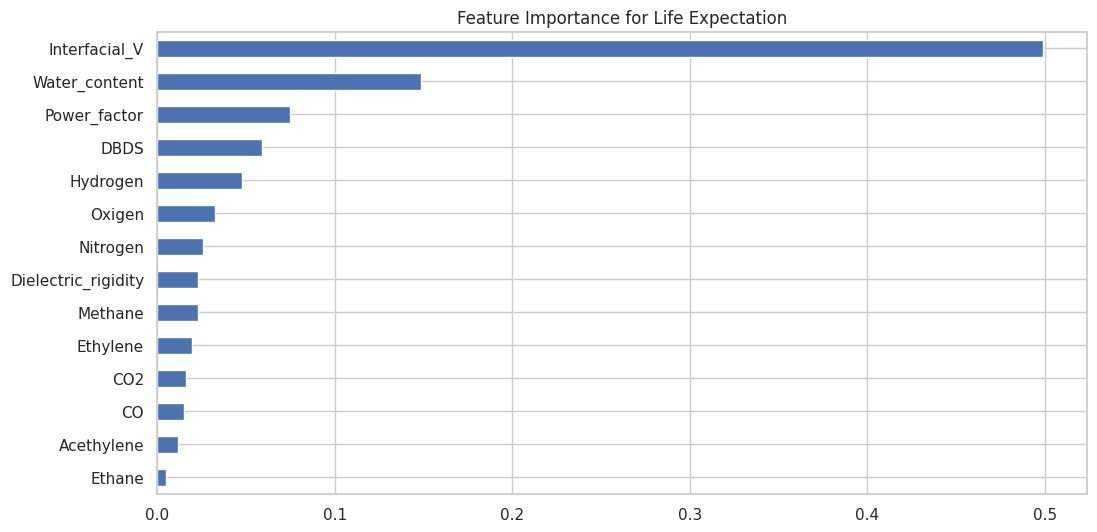

In [ ]:
feature_importance_health = pd.Series(rf_health.feature_importances_,index=X.columns)
feature_importance_life = pd.Series(rf_life.feature_importances_,index=X.columns)

plt.figure(figsize=(12,6))
feature_importance_health.sort_values().plot(kind='barh')
plt.title('Feature Importance for Health Index')
plt.show()

plt.figure(figsize=(12,6))
feature_importance_life.sort_values().plot(kind='barh')
plt.title('Feature Importance for Life Expectation')
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel
#!pip install scikit-learn
rf_model_health = RandomForestRegressor(random_state=42)

# Fit the model for health
rf_model_health.fit(X_train, y_health_train)

# Get feature importances for health
feature_importances_health = rf_model_health.feature_importances_

# Select top 7 features based on importances for health
sfm_health = SelectFromModel(rf_model_health, threshold=-np.inf, max_features=7)
sfm_health.fit(X_train, y_health_train)

# Transform the data to include only the selected features for health
X_train_top7_health = sfm_health.transform(X_train)
X_test_top7_health = sfm_health.transform(X_test)

# Train a model using only the top 7 features for health
rf_model_top7_health = RandomForestRegressor(random_state=42)
rf_model_top7_health.fit(X_train_top7_health, y_health_train)

# Make predictions for health
y_pred_top7_health = rf_model_top7_health.predict(X_test_top7_health)

# Evaluate the model for health
accuracy_top7_health = r2_score(y_health_test, y_pred_top7_health)
print('R2 Score for Model with Top 7 Features (Health):', accuracy_top7_health)

# Initialize a RandomForestRegressor for life
rf_model_life = RandomForestRegressor(random_state=42)

# Fit the model for life
rf_model_life.fit(X_train, y_life_train)

# Get feature importances for life
feature_importances_life = rf_model_life.feature_importances_

# Select top 7 features based on importances for life
sfm_life = SelectFromModel(rf_model_life, threshold=-np.inf, max_features=7)
sfm_life.fit(X_train, y_life_train)

# Transform the data to include only the selected features for life
X_train_top7_life = sfm_life.transform(X_train)
X_test_top7_life = sfm_life.transform(X_test)

# Train a model using only the top 7 features for life
rf_model_top7_life = RandomForestRegressor(random_state=42)
rf_model_top7_life.fit(X_train_top7_life, y_life_train)

# Make predictions for life
y_pred_top7_life = rf_model_top7_life.predict(X_test_top7_life)

# Evaluate the model for life
accuracy_top7_life = r2_score(y_life_test, y_pred_top7_life)
print('R2 Score for Model with Top 7 Features (Life):', accuracy_top7_life)

R2 Score for Model with Top 7 Features (Health): 0.7602352638105413
R2 Score for Model with Top 7 Features (Life): 0.8575903358982024


In [ ]:
cross_val_scores_health = cross_val_score(rf_model_top7_health, X_train_top7_health, y_health_train, cv=5, scoring='r2')
print('Cross-Validation Scores for Health Prediction:', cross_val_scores_health)

# Cross-validation for life prediction
cross_val_scores_life = cross_val_score(rf_model_top7_life, X_train_top7_life, y_life_train, cv=5, scoring='r2')
print('Cross-Validation Scores for Life Prediction:', cross_val_scores_life)

Cross-Validation Scores for Health Prediction: [0.72241926 0.77645198 0.43938097 0.61984966 0.78352836]
Cross-Validation Scores for Life Prediction: [0.65479754 0.81427703 0.72795892 0.46761828 0.71111248]


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Hyperparameter tuning for Health Prediction
grid_search_health = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search_health.fit(X_train_top7_health, y_health_train)

# Print the best parameters for Health Prediction
print("Best Parameters for Health Prediction:", grid_search_health.best_params_)

# Train the model with the best parameters for Health Prediction
best_rf_model_health = grid_search_health.best_estimator_
best_rf_model_health.fit(X_train_top7_health, y_health_train)

# Hyperparameter tuning for Life Prediction
grid_search_life = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search_life.fit(X_train_top7_life, y_life_train)

# Print the best parameters for Life Prediction
print("Best Parameters for Life Prediction:", grid_search_life.best_params_)

# Train the model with the best parameters for Life Prediction
best_rf_model_life = grid_search_life.best_estimator_
best_rf_model_life.fit(X_train_top7_life, y_life_train)


Best Parameters for Health Prediction: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best Parameters for Life Prediction: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


RandomForestRegressor(min_samples_leaf=2, random_state=42)

In [ ]:
# Predictions on the test set for Health Prediction
y_pred_test_health = best_rf_model_health.predict(X_test_top7_health)

# Evaluate the model accuracy for Health Prediction
accuracy_test_health = r2_score(y_health_test, y_pred_test_health)
print('R2 Score for Health Prediction on Test Set:', accuracy_test_health)

# Cross-validation for Health Prediction with the best model
cross_val_scores_health_best = cross_val_score(best_rf_model_health, X_train_top7_health, y_health_train, cv=5, scoring='r2')
print('Cross-Validation Scores for Health Prediction with Best Model:', cross_val_scores_health_best)

# Predictions on the test set for Life Prediction
y_pred_test_life = best_rf_model_life.predict(X_test_top7_life)

# Evaluate the model accuracy for Life Prediction
accuracy_test_life = r2_score(y_life_test, y_pred_test_life)
print('R2 Score for Life Prediction on Test Set:', accuracy_test_life)

# Cross-validation for Life Prediction with the best model
cross_val_scores_life_best = cross_val_score(best_rf_model_life, X_train_top7_life, y_life_train, cv=5, scoring='r2')
print('Cross-Validation Scores for Life Prediction with Best Model:', cross_val_scores_life_best)


R2 Score for Health Prediction on Test Set: 0.7669256984463569
Cross-Validation Scores for Health Prediction with Best Model: [0.73328375 0.78557499 0.42224106 0.69780519 0.783911  ]
R2 Score for Life Prediction on Test Set: 0.8525302878804755
Cross-Validation Scores for Life Prediction with Best Model: [0.64496206 0.81573807 0.74110135 0.52784179 0.72690608]


In [ ]:
# Extract feature importances for Health Prediction
feature_importances_health = best_rf_model_health.feature_importances_

# Extract feature names
feature_names_health = list(X.columns)

# Create a dictionary mapping feature names to their importance scores
feature_importance_dict_health = dict(zip(feature_names_health, feature_importances_health))

# Print the top 7 important features for Health Prediction
print("Top 7 Important Features for Health Prediction:")
for feature, importance in sorted(feature_importance_dict_health.items(), key=lambda x: x[1], reverse=True)[:7]:
    print(f"{feature}: {importance:.4f}")

# Extract feature importances for Life Prediction
feature_importances_life = best_rf_model_life.feature_importances_

# Extract feature names
feature_names_life = list(X.columns)

# Create a dictionary mapping feature names to their importance scores
feature_importance_dict_life = dict(zip(feature_names_life, feature_importances_life))

# Print the top 7 important features for Life Prediction
print("\nTop 7 Important Features for Life Prediction:")
for feature, importance in sorted(feature_importance_dict_life.items(), key=lambda x: x[1], reverse=True)[:7]:
    print(f"{feature}: {importance:.4f}")


Top 7 Important Features for Health Prediction:
CO2: 0.3575
Oxigen: 0.2895
Ethylene: 0.1107
Hydrogen: 0.0683
CO: 0.0614
Methane: 0.0566
Nitrogen: 0.0560

Top 7 Important Features for Life Prediction:
CO2: 0.4992
Ethylene: 0.1642
CO: 0.0939
Hydrogen: 0.0799
Methane: 0.0630
Oxigen: 0.0531
Nitrogen: 0.0467


In [ ]:
import joblib
joblib.dump(best_rf_model_health,'Model_health.pkl')



['Model_health.pkl']

In [ ]:
joblib.dump(best_rf_model_life,'Model_life.pkl')

['Model_life.pkl']

In [ ]:
# Save the life model using joblib
from joblib import dump
dump(best_rf_model_life, 'Model_life.joblib')

['Model_life.joblib']

In [ ]:
dump(best_rf_model_health, 'Model_health.joblib')



['Model_health.joblib']

In [ ]:
# Assuming you have a new set of input parameters for prediction
new_input_parameters = [1344, 5860, 16684, 2845, 32, 7406,27842]

# Reshape input_parameters to a 2D array
new_input_parameters_reshaped = [new_input_parameters]

# Make predictions for health
new_health_prediction = best_rf_model_health.predict(new_input_parameters_reshaped)

# Make predictions for life
new_life_prediction = best_rf_model_life.predict(new_input_parameters_reshaped)

# Print the predictions
print("New Health Prediction:", new_health_prediction)
print("New Life Prediction:", new_life_prediction)


New Health Prediction: [1.79035435]
New Life Prediction: [-0.85212004]
